# CMSC 471: Introduction to Artificial Intelligence


# Support Vector Machine Classification
## Multiclass Classification of Handwritten Digits

## Background Section

We will be using the Scikit-learn (sklearn) Python library to explore Support Vector Machine (SVM) for character recognition of handwritten digits from 0 to 9.

## Scikit-Learn Digits Dataset

The sklearn digits dataset consists of 1797, $8\times 8$ pixel greyscale images of handwritten digits from 0 to 9.

There are 10 distinct classes, one for each digit from 0 to 9.

This dataset has been labelled, meaning human(s) reviewed the handwritten samples and manually classified them. These labels are the ground truth and will be used to test the predictions of the classifier.

## Classifiying handwritten digits

1. import libraries.
2. load dataset.

$
\renewcommand\vec{\mathbf}
$

In [13]:
import numpy as np
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Explore the dataset

Load the digit dataset.

In [14]:
digits = datasets.load_digits()

The dataset is stored as a Python dictionary object.

The data and target values are stored as Numpy arrays.

The data attribute contains the data and the target attribute contains the labels.

Print out all the keys.

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

A description of the dataset can be printed using the DESCR key.

In [6]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

Print out the shape of the data and verify it is two-dimensional with the first dimension having size 1797.

In [15]:
print("shape      = ", digits.data.shape)
print("dimensions = ", len(digits.data.shape))

shape      =  (1797, 64)
dimensions =  2


Print out the shape and number of dimensions of the target.

In [16]:
print("shape      = ", digits.target.shape)
print("dimensions = ", len(digits.target.shape))

shape      =  (1797,)
dimensions =  1


Let's look at the first image. The label is shown above it.

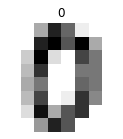

In [17]:
axes = plt.figure(figsize=(2, 2))
ax = axes.add_subplot()
ax.set_axis_off()
ax.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title("%i" % digits.target[0])
plt.show()

Each of the 1797 images in the dataset has been transformed into a 64-dimensional feature vector.

A feature vector for a digit is produced simply by linearizing the 2D image of the $8\times 8=64$ pixels into a 1D vector. Hence the number of features is the total number of pixels (64). A feature is a grayscale pixel value.

The feature vectors dataset is an $n \times d$ matrix of $n$ samples each with $d$ features.

These feature vectors are stored in the data attribute.

Print the feature vector for the first image.

In [18]:
digits.data[0] 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

The data, in this case feature vectors, are the independent variables, also known as the predictors.

These are the x-coordinates of data points in a hyperplane.

Print a summary of all the data.

In [19]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

The target are the dependent variables, also known as the indicators or response/outcome variables.

These are the y-coordinates of data points in a hyperplane.

Print a summary of the target values (labels) for the data.

In [20]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Since the digits are 0 to 9 then there are only ten unique labels.

Verify there are only ten labels.

In [21]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Visualize the first 20 images from the digits dataset.

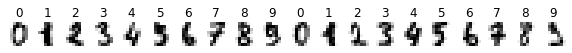

In [22]:
_, axes = plt.subplots(nrows=1, ncols=20, figsize=(10, 5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

Visualize the first handwritten example of the number 5.

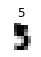

In [23]:
axes = plt.figure(figsize=(.5, .5))
ax = axes.add_subplot()
ax.set_axis_off()
ax.imshow(digits.images[5], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title("%i" % digits.target[5])
plt.show()

Next we'll train a classifier on the data and use it to classify data it has not seen before.

The following custom function will be used to plot the results.

In [24]:
def plot_confusion_matrix(classifier, X_test, y_test):
    _, axes = plt.subplots(figsize=(8, 6))
    metrics.plot_confusion_matrix(classifier, X_test, y_test, ax=axes, normalize='true')
    plt.show()
    print(f"Accuracy: %.2f%%" % (classifier.score(X_test, y_test)*100))

## Support Vector Machine

Load the Support Vector Machine classifier.

In [25]:
classifier = svm.SVC()

Fit all but the last (x,y) point. The last image is labelled as the digit 8.

After fitting, the classifier will be used to predict the label for this last data point.

In [26]:
classifier.fit(digits.data[:-1], digits.target[:-1])

SVC()

Now use the classifier to predict the last (x,y) data point.

In [27]:
y_prediction = classifier.predict(digits.data[-1:])
print(y_prediction)

[8]


The SVM classifier predicts the last data to be the number 8 digit.

Plot the figure predicted by the SVM classifier. 

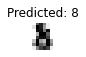

In [28]:
axes = plt.figure(figsize=(.5, .5))
ax = axes.add_subplot()
ax.set_axis_off()
ax.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title("Predicted: %i" % y_prediction)
plt.show()

## Train and Test

Let's re-train the classifier by splitting the dataset into training and test sets.

#### Split data into training and testing sets

Split the dataset with three-quarters for training and one-quarter for testing.

Use the train_test_split function from the model_selection module.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.25, shuffle=False)

### Fit and Predict

Train the SVM classifier on the training set.

In [30]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)

SVC()

Predict the digits from the test set.

In [31]:
y_prediction = classifier.predict(X_test)

Visualize the predicted values for the first 20 images in the test set.

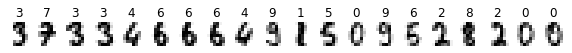

In [32]:
_,axes = plt.subplots(nrows=1, ncols=20, figsize=(10, 5))
for ax, image, label in zip(axes, X_test, y_prediction):
    image = image.reshape(8, 8);
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

Notice that the predicted label is 6 for the sixth handwritten digit from the right, but it is most certainly a 5.

Print the accuracy of the classifer.

In [33]:
print("Accuracy: %.2f%%" % (classifier.score(X_test, y_test)*100))

Accuracy: 94.89%


The accuracy for the SVM classifier is 94.89%.

Print the confusion matrix.

The confusion matrix is generated by running the classifier on the test set then constructing the True vs Predicted labels matrix elements using the labels from the test set.

/Users/peterngaba/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


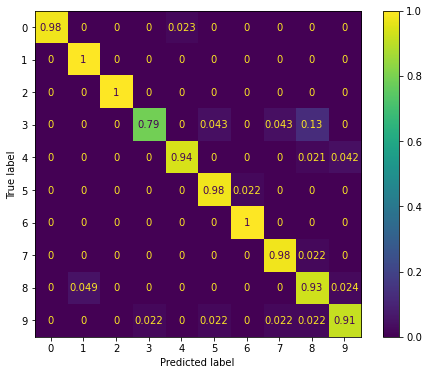

Accuracy: 94.89%


In [34]:
plot_confusion_matrix(classifier, X_test, y_test)

### Gathering Metrics

Rview the classification metrics report.

In [35]:
svm_report = metrics.classification_report(y_test, y_prediction)
print("SVM Classification Report:\n", svm_report)

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.96      1.00      0.98        46
           2       1.00      1.00      1.00        43
           3       0.97      0.79      0.87        47
           4       0.98      0.94      0.96        48
           5       0.94      0.98      0.96        45
           6       0.98      1.00      0.99        47
           7       0.94      0.98      0.96        45
           8       0.81      0.93      0.86        41
           9       0.93      0.91      0.92        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



### Tuning Parameters

Let's see if it can be improved by manually setting a parameter.

In [36]:
classifier = svm.SVC(gamma=.003)
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)

Here we set the parameter gamma to .003. The gamma parameter is used with the Radial Basis Function (RBF) kernel to adjust the influence a single data point has on "nearby" data points.

<div class="alert alert-block alert-info">
NOTE: The RBF Kernel is $\exp^{-\gamma \lVert x - x^\prime \rVert^2}$, where $\gamma > 0$. The term $\lVert x -x^\prime \rVert^2$ is the square of the Euclidean distance between two sample points, $x,x^\prime$.
</div>

The value of gamma ($\gamma$) is used to adjust the radius, i.e. neighborhood, of influence for each data point.

It is inversely related to the radius of influence. Thus smaller gamma leads to larger influence.

Now plot the confusion matrix and print the accuracy again.

/Users/peterngaba/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


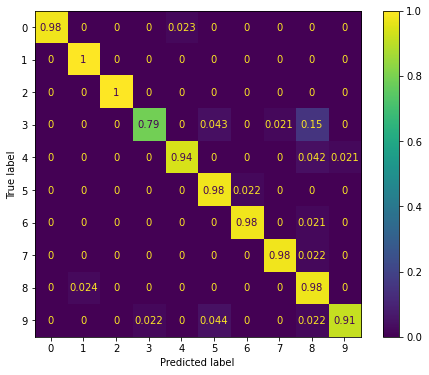

Accuracy: 95.11%


In [37]:
plot_confusion_matrix(classifier, X_test, y_test)

The accuracy has improved from 94.89% to 95.11%.

But the sixth digit from the right is still misclassified.

## Exercise

Improve the accuracy. Print out your new accuracy score.

In [42]:
# DO NOT MODIFY THIS BLOCK
# BEGIN BLOCK
X_train = None
y_train = None
X_test = None
y_test = None
# END BLOCK

# Modify the remainder of this cell until the final accuracy printout.

# Reference data.
X = digits.data
y = digits.target

# Get classifier.
cl = svm.SVC(gamma=.001)

# Split data into testing and training sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=False)

# Fit and Predict.
cl.fit(X_train, y_train)
y_prediction = cl.predict(X_test);

# Accuracy.
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_prediction)*100))

Accuracy: 96.67%


## End of Excercise

## CMSC 471